# Exercise notebook 3: Transforming and Combining Data
© The Open University

In Week 1 you worked on a dataset that combined two different World Health Organization datasets: population and the number of deaths due to tuberculosis.

They could be combined because they share a common attribute: the countries. This week you will learn the techniques behind the creation of such a combined dataset.

This Jupyter notebook is for Part 3 of The Open University's _Learn to code for Data Analysis_ course.

This notebook has all code examples and coding exercises. Remember to start by running the code in this notebook. You will need to add a code cell below each task to complete it.

You'll come across steps in the course directing you to this notebook. Once you've done each exercise, go back to the corresponding step and mark it as complete.

Life expectancy project
This week I wish to see (literally, via a chart) if the life expectancy in richer countries tends to be longer.

Richer countries can afford to spend more on healthcare and on road safety, for example, to reduce mortality. On the other hand, richer countries may have less healthy lifestyles.

The World Bank provides loans and grants to governments of middle and low-income countries to help reduce poverty. As part of their work, the World Bank has put together hundreds of datasets on a range of issues, such as health, education, economy, energy and the effectiveness of aid in different countries. I will use two of their datasets, which you can see online by following the links below. You do not need to download the datasets.

One dataset lists the gross domestic product (GDP) for each country, in United States dollars and cents; the other lists the life expectancy, in years, for each country. The latest life expectancy data I can access is for 2013, so that will be the year I take for the GDP. The disadvantage of using the GDP and the life expectancy values for the same year is that they do not account for the time it takes for a country’s wealth to have an effect on lifestyle, healthcare and other factors influencing life expectancy.

While it is useful to have all GDPs in a common currency to compare different countries, it doesn’t make much sense to report the GDP of a whole country to a supposed precision of a US cent. I noted that the value for the USA is a round number, but it is not for other countries. This is likely due in part to the conversion of local currencies to US dollars. It makes more sense to report the GDP values in a larger unit, e.g. millions of dollars. Moreover, for those who don’t live in a country using the US dollar as the official currency, it’s probably easier to understand GDP values in their own local currency.

To sum up, this week’s project will transform currency values and combine GDP and life expectancy data.

In [37]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *

## Exercise 1: Creating the data

Dataframes can be constructed from scratch as follows.

In [38]:
COUNTRY = 'Country'
GDP_USD = 'GDP (US$)'
headings = [COUNTRY, GDP_USD]
table = [
  ['UK', 2678454886796.7],    # 1st row
  ['USA', 16768100000000.0],  # 2nd row
  ['China', 9240270452047.0], # and so on...
  ['Brazil', 2245673032353.8],
  ['South Africa', 366057913367.1]
]
gdp = DataFrame(columns=headings, data=table)
gdp

,Country,GDP (US$)
0,UK,2.678455e+12
1,USA,1.676810e+13
2,China,9.240270e+12
3,Brazil,2.245673e+12
4,South Africa,3.660579e+11


Small tables make it easier to see what is going on and to create specific data combination and transformation scenarios that test the code.

And similarly for the life expectancy of those born in 2013...

In [39]:
LIFE_EXP ='Life expectancy (years)'
headings = [ COUNTRY, LIFE_EXP ]
table = [
  ['China', 75],
  ['Russia', 71],  
  ['United States', 79],
  ['India', 66],
  ['United Kingdom', 81]
]
life = DataFrame(columns=headings, data=table)
life

,Country,Life expectancy (years)
0,China,75
1,Russia,71
2,United States,79
3,India,66
4,United Kingdom,81


### Task

Create a dataframe with all five BRICS countries and their population, in thousands of inhabitants, in 2013. The values (given in the first exercise notebook) are: Brazil 200362, Russian Federation 142834, India 1252140, China 1393337, South Africa 52776.

In [40]:
POP_1000 = 'Pop1000s'
heading = [COUNTRY, POP_1000 ]
table = [['Brazil', 200362], ['Russian Federation',142834], ['India', 1252140], ['China', 1393337], ['South Africa', 52776]]

bricsdf = DataFrame(columns = heading, data = table)
bricsdf

,Country,Pop1000s
0,Brazil,200362
1,Russian Federation,142834
2,India,1252140
3,China,1393337
4,South Africa,52776


**Now go back to the course step and mark it complete.**

## Exercise 2: Defining functions

The following function, written in two different ways, rounds a number to the nearest million. It calls the Python function `round()` which rounds a decimal number to the nearest integer. If two integers are equally near, it rounds to the even integer.

In [41]:
def roundToMillions (value):
    result = round(value / 1000000)
    return result

In [42]:
def roundToMillions (value):
    return round(value / 1000000)

To test a function, write expressions that check for various argument values whether the function returns the expected value in each case. **The art of testing is to find as few test cases as possible that cover all bases. And I mean all, especially those you think ‘Naaah, it’ll never happen’. It will, because data can be incorrect. Prepare for the worst and hope for the best.**

In [43]:
roundToMillions(4567890.1) == 5

True

In [44]:
roundToMillions(0) == 0  # always test with zero...

True

In [45]:
roundToMillions(-1) == 0 # ...and negative numbers

True

In [46]:
roundToMillions(1499999) == 1 # test rounding to the nearest

True

The next function converts US dollars to British pounds.

In [47]:
def usdToGBP (usd):
    return usd / 1.564768 # average rate during 2013 

usdToGBP(0) == 0

True

In [48]:
usdToGBP(1.564768) == 1

True

In [49]:
usdToGBP(-1) < 0

True

### Tasks

1. Define a few more test cases for both functions.
- Why can't you use `roundToMillions()` to round the population to millions of inhabitants? Write a new function and test it. **You need to write this function in preparation for Exercise 4.**
- Write a function to convert US dollars to your local currency. If your local currency is USD or GBP, convert to Euros. Look up online what was the average exchange rate in 2013.

Defining functions is such an important part of coding, that you should not skip the next exercise where you will define your own functions.

In [50]:
roundToMillions(1599999) == 1 

False

In [51]:
usdToGBP(1.664768) == 1

False

In [52]:
usdToGBP(1.664768)

1.0639072373668175

New function to round to millions. The data in the Pop1000s column is in 1000s so first we have to convert it to its normal form by multiplying by 1000. and then carry out the operation.

In [53]:
def roundToMillionsPop (value):
    result = round(value*1000 / 1000000)
    return result

In [54]:
roundToMillionsPop(bricsdf.Pop1000s)

0     200.0
1     143.0
2    1252.0
3    1393.0
4      53.0
Name: Pop1000s, dtype: float64

USD to INR conversion function

In [55]:
def usdToINR (value):
    return value*77.93

In [56]:
usdToINR (20)

1558.6000000000001

**Now go back to the course step and mark it complete.**

## Exercise 3: What if...?

The next function uses the full form of the conditional statement to expand the abbreviated country names UK and USA and leave other names unchanged.

In [57]:
def expandCountry (name):
    if name == 'UK':
        return 'United Kingdom'
    elif name == 'USA':
        return 'United States'
    else:
        return name

expandCountry('India') == 'India'

True

Note again the colons at the end of lines and that code after the colon must be indented. That is how Python distinguishes which lines of code belong to which condition.
There are almost always many ways to write the same function. A conditional statement does not need to have an 'elif' or 'else' part. In that case, if the condition is false, nothing happens. Here is the same function, written differently.

Here is the same function, written differently, using the simplest form of the conditional statement, without the `elif` and `else` parts.

In [58]:
def expandCountry (name):
    if name == 'UK':
        name = 'United Kingdom'
    if name == 'USA':
        name = 'United States'
    return name

@mikeColmer
I don't see the point of 'elif'.

In the first version of the function if you use 'if' rather than 'elif' it seems to work exactly the same.

So what does 'elif' do that 'if' cannot?

@andreas wernecke
You are right in this case both versions do the same thing. But that is only because name == 'UK' and name == 'USA' cannot be True at the same time. 
An example to illustrate the difference:

If True: #do a first thing 
elif True: #do a second thing 
else: #do a third thing

will only execute the first thing while

If True: #do a first thing 
if True: #do a second thing 
else: #do a third thing

will do thing one and two

If you want to make sure that only one of the things is done (as here it would make no sense to override the name twice) it is better to use elif in order to avoid bugs.

### Tasks

1. Write more tests.
- Explain why the second version of the function works. Note how the code is indented.
- Extend both versions to expand 'St. Lucia' to 'Saint Lucia'.
- Write a function to translate some country names from their original language to English, e.g. 'Brasil' to 'Brazil', 'España' to 'Spain' and 'Deutschland' to 'Germany'.
- Can you think of a different way of expanding abbreviated country names? You're not expected to write any code. **Hint: this is a course about data tables.**

More Tests coming right up!

In [59]:
expandCountry('UK')

'United Kingdom'

In [60]:
expandCountry('uk') #doesnt work. Shows operation is Case sensitive.

'uk'

In [61]:
expandCountry('USA') == "UnitedStatesofAmerica" # Spaces matter

False

##### 2 Explain why the second version of the function works. Note how the code is indented.

In [62]:
def expandCountry (name):
    if name == 'UK':
        name = 'United Kingdom'
    if name == 'USA':
        name = 'United States'
    return name

The function first checks if the argument passed is 'UK' and if its true the variable `name` will be assigned the expaned version. If the 1st condition fails then it checks the second condition. If that too fails then the function will return nothing.

##### 3 Extend both versions to expand 'St. Lucia' to 'Saint Lucia'.

In [63]:
def expandCountry (name):
    if name == 'UK':
        return 'United Kingdom'
    elif name == 'USA':
        return 'United States'
    elif name == 'St. Lucia':
        return 'Saint Lucia'
    else:
        return name

expandCountry('St. Lucia')

'Saint Lucia'

In [64]:
def expandCountry (name):
    if name == 'UK':
        name = 'United Kingdom'
    if name == 'USA':
        name = 'United States'
    if name == 'St. Lucia':
        name = 'Saint Lucia'
    return name
expandCountry('St. Lucia')

'Saint Lucia'

#### 4 Write a function to translate some country names from their original language to English, e.g. 'Brasil' to 'Brazil', 'España' to 'Spain' and 'Deutschland' to 'Germany'

In [65]:
def translateCountry(name):
        if name == 'Brasil':
            name = 'Brazil'
        if name == 'España':
            name = 'Spain'
        if name == 'Deutschland':
            name = 'Germany'
        return name
translateCountry('Brasil')

'Brazil'

In [66]:
translateCountry('España')

'Spain'

In [67]:
translateCountry('Deutschland')

'Germany'

##### Can you think of a different way of expanding abbreviated country names? You're not expected to write any code. Hint: this is a course about data tables.

One way to do it will be to have a dataframe which has an abbreviation in one column and its full form in the other. Then you can just take the corresponding value for the abbreviations and return the same value if the abbreviation is not present in the dataframe. 

**Now go back to the course step and mark it complete.**

## Exercise 4: Applying functions

A one-argument function can be applied to each cell in a column, in order to obtain a new column with the converted values. 

In [68]:
gdp['Country Name'] = gdp[COUNTRY].apply(expandCountry)
gdp

,Country,GDP (US$),Country Name
0,UK,2.678455e+12,United Kingdom
1,USA,1.676810e+13,United States
2,China,9.240270e+12,China
3,Brazil,2.245673e+12,Brazil
4,South Africa,3.660579e+11,South Africa


@Rob We could apply the conversion and rounding functions in two separate statements, but using **method chaining**, We can apply both functions in a single line of code. 

As `apply()` is a column method that returns a column, it can be **chained**, to apply several conversions in one go. This is possible because the column returned by the first call of apply() is the context for the second call of apply().

In [69]:
gdp['GDP (£m)'] = gdp['GDP (US$)'].apply(usdToGBP).apply(roundToMillions)
gdp

,Country,GDP (US$),Country Name,GDP (£m)
0,UK,2.678455e+12,United Kingdom,1711727
1,USA,1.676810e+13,United States,10716029
2,China,9.240270e+12,China,5905202
3,Brazil,2.245673e+12,Brazil,1435148
4,South Africa,3.660579e+11,South Africa,233937


Applying the conversion functions in a different order will lead to a different result.

In [70]:
gdp['GDP (US$)'].apply(roundToMillions).apply(usdToGBP).apply(round)

0     1711727
1    10716029
2     5905201
3     1435148
4      233938
Name: GDP (US$), dtype: int64

**Note that method chaining only works if the methods chained return the same type of value as their context, in the same way that you can chain multiple arithmetic operators (e.g. 3+4-5) because each one takes two numbers and returns a number that is used by the next operator in the chain.** In this course, methods only have two possible contexts, columns and dataframes, so you can either chain column methods that return a single column (that is a Series), like apply(), or dataframe methods that return dataframes. For example, gdp.head(4).tail(2) is a dataframe just with China and Brazil, i.e. the last two of the first four rows of the dataframe shown above. You’ll see further examples of chaining (and an easier way to select multiple rows) later this week.

This concludes the data transformation part.

The original columns can be discarded.

In [71]:
headings = ['Country name', 'GDP (£m)']
gdp = gdp[headings]
gdp

KeyError: "['Country name'] not in index"

### Task

Take the dataframe you created for Exercise 1, and apply to its population column the rounding function you wrote in Exercise 2.

In [74]:
heading = ['Country name', 'Pop1000s']
table = [['Brazil', 200362], ['Russian Federation',142834], ['India', 1252140], ['China', 1393337], ['South Africa', 52776]]

bricsdf = DataFrame(columns = heading, data = table)

def roundToMillionsPop (value):
    result = round(value*1000 / 1000000)
    return result

bricsdf['PopMn'] = bricsdf['Pop1000s'].apply(roundToMillionsPop)
bricsdf

,Country name,Pop1000s,PopMn
0,Brazil,200362,200
1,Russian Federation,142834,143
2,India,1252140,1252
3,China,1393337,1393
4,South Africa,52776,53


**Now go back to the course step and mark it complete.**

## Exercise 5: Joining left, right and centre

At this point, both tables have a common column, 'Country name', with fully expanded country names.

In [75]:
life

,Country,Life expectancy (years)
0,China,75
1,Russia,71
2,United States,79
3,India,66
4,United Kingdom,81


In [77]:
gdp

,Country,GDP (US$),Country Name,GDP (£m)
0,UK,2.678455e+12,United Kingdom,1711727
1,USA,1.676810e+13,United States,10716029
2,China,9.240270e+12,China,5905202
3,Brazil,2.245673e+12,Brazil,1435148
4,South Africa,3.660579e+11,South Africa,233937


A **left join** takes the rows of the left table and adds the columns of the right table. 

In [78]:
merge(gdp, life, on='Country name', how='left')

KeyError: 'Country name'

A **right join** takes the rows from the right table, and adds the columns of the left table.

In [ ]:
merge(gdp, life, on='Country name', how='right')

An **outer join** takes the union of the rows, i.e. it has all the rows of the left and right joins.

In [ ]:
merge(gdp, life, on='Country name', how='outer')

An **inner join** takes the intersection of the rows (i.e. the common rows) of the left and right joins.

In [ ]:
gdpVsLife = merge(gdp, life, on='Country name', how='inner')
gdpVsLife

### Task

Join your population dataframe (from Exercise 4) with `gdpVsLife`, in four different ways, and note the differences.

In [ ]:
combo = merge(bricsdf, gdpVsLife, on = 'Country name', how ='inner')
combo

In [ ]:
combo = merge(bricsdf, gdpVsLife, on = 'Country name', how ='outer')
combo

In [ ]:
combo = merge(bricsdf, gdpVsLife, on = 'Country name', how ='left')
combo

In [ ]:
combo = merge(bricsdf, gdpVsLife, on = 'Country name', how ='right')
combo

#### Conclusion
gdpVsLife table had only 3 countries - UK, USA and China whereas.
bricsdf table had Brazil, Russia, India, China and South Africa
Inner - Only the countries common to both tables were kept. i.e Only China
Outer - All countries are included and Cells with no values are filled with NaN by default
Left - Rows from bricsdf is kept and the columns from gdpVsLife is added. Empty cells are filled with NaN
Right - Rows from gdpVsLife is kept and the cells with empty values are filled with NaN


**Now go back to the course step and mark it complete.**

## Exercise 6: Constant variables

Constants are used to represent fixed values (e.g. strings and numbers) that occur frequently in a program. Constant names are conventionally written in uppercase, with underscores to separate multiple words.

**Advantages of using constants:**
First, constants stand out in the code.

Second, when making changes to the repeated values throughout the code, it’s easy to miss an occurrence. Using constants means the code is always consistent throughout.

Third, the name of the constant can help clarify what the value means. For example, instead of using the number 1995 throughout the code, define a constant that makes clear whether it’s a year, the cubic centimetres of a car engine or something else.

To sum up, using constants makes the code clearer, easier to change, and less prone to silly (but hard to find) mistakes due to inconsistent values.
    

In [ ]:
GDP_USD = 'GDP (US$)'
GDP_GBP = 'GDP (£m)'
GDP_USD

### Task

Look through the code you wrote so far, and rewrite it using constants, when appropriate.

Done!

**Now go back to the course step and mark it complete.**

## Exercise 7: Getting real

It is possible to directly download data from the World Bank, for a particular time period and indicator, like the GDP in current US dollars. The indicator name is given in the URL of the webpage about the dataset.

Getting the data directly from the World Bank only works with Anaconda (or a paid CoCalc account) and requires an Internet connection. It can take some time to download the data, depending on the speed of your connection and the load on the World Bank server. Moreover, the World Bank occasionally changes the layout of the data, which could break the code in the rest of this notebook. 

To avoid such problems I have saved the World Bank data into CSV files. The data is in a column with the same name as the indicator. Hence I declare the indicator names as constants, to be used later when processing the dataframe.

In [97]:
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdpReset = read_csv('WB GDP 2013.csv')

LIFE_INDICATOR = 'SP.DYN.LE00.IN'
lifeReset = read_csv('WB LE 2013.csv')

@ Rob Open a new browser window and go to the World Bank’s data page. Type ‘GDP’ (without the quote marks) in the search box in the centre of the page and select ‘GDP current US$’. This will take you to the data page you looked at earlier. Look at the top of your browser window. You will notice the URL is http://data.worldbank.org/indicator/NY.GDP.MKTP.CD. Every World Bank indicator (in this case GDP in current dollars) has a unique name (in this case NY.GDP.MKTP.CD).

Knowing the indicator name, it’s a doddle to get the data directly into a dataframe, by using the download() function of the wb (World Bank) module, instead of first downloading a CSV or Excel file and then loading it into a dataframe. (Note that CoCalc’s free plan doesn’t allow connecting to other sites, so in that case one would need to download the data as a CSV or Excel file from the World Bank and upload it to CoCalc.)

The CSV files were obtained in two steps, which are shown next in commented code because we already have the CSV files. 

First the data was obtained directly from the World Bank using a particular function in pandas, and indicating the desired indicator and time period. Note that you may have to install the `pandas_datareader` module, using Anaconda Navigator.

In [ ]:
#if pandas.__version__.startswith('0.23'):
#     # this solves an incompatibility between pandas 0.23 and datareader 0.6
#     # taken from https://stackoverflow.com/questions/50394873/
#     core.common.is_list_like = api.types.is_list_like

    #from pandas_datareader.wb import download

    #YEAR = 2013
    #GDP_INDICATOR = 'NY.GDP.MKTP.CD'
    #gdpWB = download(indicator=GDP_INDICATOR, country='all', start=YEAR, end=YEAR)
    #lifeWB = download(indicator=LIFE_INDICATOR, country='all', start=YEAR, end=YEAR)
# 

The downloaded dataframe has descriptive row names instead of the usual 0, 1, 2, etc. In other words, the dataframe's index is given by the country and year instead of integers. Hence the second step was to reset the index. 

In [96]:
# gdpReset = gdpWB.reset_index()
# lifeReset = lifeWB.reset_index()

Resetting the index put the dataframes into the usual form, which was saved to CSV files. 

In [98]:
lifeReset.head()

,country,year,SP.DYN.LE00.IN
0,Arab World,2013,70.631305
1,Caribbean small states,2013,71.901964
2,Central Europe and the Baltics,2013,76.127583
3,East Asia & Pacific (all income levels),2013,74.604619
4,East Asia & Pacific (developing only),2013,73.657617


### Tasks

1. Create a data frame with the World Bank's data on population, using the CSV file provided. **This dataframe will be used in the remaining exercises.**
- If you're using Anaconda, uncomment the code above and run it to check that you can get the GDP and life expectancy data directly from the World Bank. **Don't forget to afterwards comment again the code.**
- If you have extra time, you can alternatively obtain the population data directly from the World Bank: go to their [data page](http://data.worldbank.org/), search for population, select the total population indicator, note its name in the URL, copy the commented code above and adapt it to get the data and reset its index. Note that the World Bank may have changed its data format since this was written and therefore you may have to do extra steps to get a dataframe in the same shape as the CSV file we provide, with three columns for country name, year and population.

In [99]:
wbpop = read_csv('WB POP 2013.csv')
wbpop

,country,year,SP.POP.TOTL
0,Arab World,2013,3.770967e+08
1,Caribbean small states,2013,6.975819e+06
2,Central Europe and the Baltics,2013,1.037137e+08
3,East Asia & Pacific (all income levels),2013,2.248867e+09
4,East Asia & Pacific (developing only),2013,2.006073e+09
5,Euro area,2013,3.372839e+08
6,Europe & Central Asia (all income levels),2013,8.988371e+08
7,Europe & Central Asia (developing only),2013,2.624163e+08
8,European Union,2013,5.065580e+08
9,Fragile and conflict affected situations,2013,4.617132e+08


**Now go back to the course step and mark it complete.**

## Exercise 8: Cleaning up

The expression `frame[m:n]` represents a dataframe with only row `m` to row `n-1` (or until the end if `n` is omitted) of `frame`.

You may have noticed that the initial rows are not about countries, but groups of countries. Such aggregated values need to be removed, because we’re only interested in individual countries.

In [100]:
lifeReset[0:3]

,country,year,SP.DYN.LE00.IN
0,Arab World,2013,70.631305
1,Caribbean small states,2013,71.901964
2,Central Europe and the Baltics,2013,76.127583


In [101]:
lifeReset[240:]

,country,year,SP.DYN.LE00.IN
240,Vanuatu,2013,71.669244
241,"Venezuela, RB",2013,74.074415
242,Vietnam,2013,75.756488
243,Virgin Islands (U.S.),2013,79.624390
244,West Bank and Gaza,2013,73.203341
245,"Yemen, Rep.",2013,63.583512
246,Zambia,2013,59.237366
247,Zimbabwe,2013,55.633000


The first rows of World Bank dataframes are aggregated data for country groups, and are thus discarded. There were 34 country groups when I generated the CSV files, but the World Bank sometimes adds or removes groups. Therefore, if you obtained the data directly from the World Bank, you may need to discard more or fewer than 34 rows to get a dataframe that starts with Afghanistan.

In [102]:
gdpCountries = gdpReset[34:]
lifeCountries = lifeReset[34:]
gdpCountries.head()

,country,year,NY.GDP.MKTP.CD
34,Afghanistan,2013,2.045894e+10
35,Albania,2013,1.278103e+10
36,Algeria,2013,2.097035e+11
37,American Samoa,2013,NaN
38,Andorra,2013,3.249101e+09


Rows with missing data are dropped.

In [103]:
gdpData = gdpCountries.dropna()
lifeData = lifeCountries.dropna()
gdpData.head()

,country,year,NY.GDP.MKTP.CD
34,Afghanistan,2013,2.045894e+10
35,Albania,2013,1.278103e+10
36,Algeria,2013,2.097035e+11
38,Andorra,2013,3.249101e+09
39,Angola,2013,1.383568e+11


The year column is discarded.

In [104]:
COUNTRY = 'country'
headings = [COUNTRY, GDP_INDICATOR]
gdpClean = gdpData[headings]
headings = [COUNTRY, LIFE_INDICATOR]
lifeClean = lifeData[headings]
lifeClean.head()

,country,SP.DYN.LE00.IN
34,Afghanistan,60.028268
35,Albania,77.537244
36,Algeria,74.568951
39,Angola,51.866171
40,Antigua and Barbuda,75.778659


### Task

Clean the population dataframe you created in Exercise 7.

If in Exercise 7 you chose to directly get the population data from the World Bank instead of using the provided CSV file, you may need to remove more (or fewer) than 34 rows at the start of the dataframe due to changes done by the World Bank to its data reporting.

In [105]:
wbpop[0:3]

,country,year,SP.POP.TOTL
0,Arab World,2013,377096710.0
1,Caribbean small states,2013,6975819.0
2,Central Europe and the Baltics,2013,103713726.0


In [106]:
wbpop[240:]

,country,year,SP.POP.TOTL
240,Vanuatu,2013,253165.0
241,"Venezuela, RB",2013,30276045.0
242,Vietnam,2013,89708900.0
243,Virgin Islands (U.S.),2013,104737.0
244,West Bank and Gaza,2013,4169506.0
245,"Yemen, Rep.",2013,25533217.0
246,Zambia,2013,15246086.0
247,Zimbabwe,2013,14898092.0


In [107]:
popCountries = wbpop[34:]
popCountries.head()

,country,year,SP.POP.TOTL
34,Afghanistan,2013,30682500.0
35,Albania,2013,2897366.0
36,Algeria,2013,38186135.0
37,American Samoa,2013,55302.0
38,Andorra,2013,75902.0


In [108]:
popData = popCountries.dropna()
popData.head()

,country,year,SP.POP.TOTL
34,Afghanistan,2013,30682500.0
35,Albania,2013,2897366.0
36,Algeria,2013,38186135.0
37,American Samoa,2013,55302.0
38,Andorra,2013,75902.0


In [109]:
COUNTRY = 'country'
POP = 'SP.POP.TOTL'
headings = [COUNTRY, POP]
popClean = popData[headings]
popClean

,country,SP.POP.TOTL
34,Afghanistan,30682500.0
35,Albania,2897366.0
36,Algeria,38186135.0
37,American Samoa,55302.0
38,Andorra,75902.0
39,Angola,23448202.0
40,Antigua and Barbuda,89985.0
41,Argentina,42538304.0
42,Armenia,2992192.0
43,Aruba,102921.0


**Now go back to the course step and mark it complete.**

## Exercise 9: Joining and transforming

The two dataframes can now be merged with an inner join.

In [110]:
gdpVsLifeAll = merge(gdpClean, lifeClean, on=COUNTRY, how='inner')
gdpVsLifeAll.head()

,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN
0,Afghanistan,2.045894e+10,60.028268
1,Albania,1.278103e+10,77.537244
2,Algeria,2.097035e+11,74.568951
3,Angola,1.383568e+11,51.866171
4,Antigua and Barbuda,1.200588e+09,75.778659


The dollars are converted to million pounds.

In [111]:
GDP = 'GDP (£m)'
column = gdpVsLifeAll[GDP_INDICATOR]
gdpVsLifeAll[GDP] = column.apply(usdToGBP).apply(roundToMillions)
gdpVsLifeAll.head()

,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN,GDP (£m)
0,Afghanistan,2.045894e+10,60.028268,13075
1,Albania,1.278103e+10,77.537244,8168
2,Algeria,2.097035e+11,74.568951,134016
3,Angola,1.383568e+11,51.866171,88420
4,Antigua and Barbuda,1.200588e+09,75.778659,767


The life expectancy is rounded, by applying the `round()` function.

In [112]:
LIFE = 'Life expectancy (years)'
gdpVsLifeAll[LIFE] = gdpVsLifeAll[LIFE_INDICATOR].apply(round)
gdpVsLifeAll.head()

,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN,GDP (£m),Life expectancy (years)
0,Afghanistan,2.045894e+10,60.028268,13075,60
1,Albania,1.278103e+10,77.537244,8168,78
2,Algeria,2.097035e+11,74.568951,134016,75
3,Angola,1.383568e+11,51.866171,88420,52
4,Antigua and Barbuda,1.200588e+09,75.778659,767,76


The original GDP and life expectancy columns are dropped.

In [113]:
headings = [COUNTRY, GDP, LIFE]
gdpVsLifeClean = gdpVsLifeAll[headings]
gdpVsLifeClean.head()

,country,GDP (£m),Life expectancy (years)
0,Afghanistan,13075,60
1,Albania,8168,78
2,Algeria,134016,75
3,Angola,88420,52
4,Antigua and Barbuda,767,76


### Tasks

1. Merge `gdpVsLifeClean` with the population dataframe obtained in the previous exercise. 
- Round the population value to the nearest million.
- Remove the original population column.

In [114]:
gdpLifePop = merge(gdpVsLifeClean, popClean, on=COUNTRY, how='inner')
gdpLifePop.head()

,country,GDP (£m),Life expectancy (years),SP.POP.TOTL
0,Afghanistan,13075,60,30682500.0
1,Albania,8168,78,2897366.0
2,Algeria,134016,75,38186135.0
3,Angola,88420,52,23448202.0
4,Antigua and Barbuda,767,76,89985.0


In [115]:
column = gdpLifePop['SP.POP.TOTL']
gdpLifePop['SP.POP.TOTL'] = column.apply(roundToMillionsPop)
gdpLifePop.head()

,country,GDP (£m),Life expectancy (years),SP.POP.TOTL
0,Afghanistan,13075,60,30682
1,Albania,8168,78,2897
2,Algeria,134016,75,38186
3,Angola,88420,52,23448
4,Antigua and Barbuda,767,76,90


In [116]:
POP = 'SP.POP.TOTL'
headings = [COUNTRY, GDP, LIFE, POP]
gdpLifePop = gdpLifePop[headings]
gdpLifePop.head()

,country,GDP (£m),Life expectancy (years),SP.POP.TOTL
0,Afghanistan,13075,60,30682
1,Albania,8168,78,2897
2,Algeria,134016,75,38186
3,Angola,88420,52,23448
4,Antigua and Barbuda,767,76,90


In [117]:
gdpLifePop = gdpLifePop.rename(columns={'SP.POP.TOTL': 'Population'})
gdpLifePop.head()

,country,GDP (£m),Life expectancy (years),Population
0,Afghanistan,13075,60,30682
1,Albania,8168,78,2897
2,Algeria,134016,75,38186
3,Angola,88420,52,23448
4,Antigua and Barbuda,767,76,90


**Now go back to the course step and mark it complete.**

## Exercise 10: Correlation

The Spearman rank correlation coefficient between GDP and life expectancy, and the corresponding p-value are calculated as follows.

Correlation
To see if life expectancy grows when the GDP increases I will use a statistical measure known as the Spearman rank correlation coefficient.

It’s a number between -1 and 1 that describes how well two indicators correlate, in the following sense.

A value of 1 means that if I rank (sort) the data from smallest to largest value in one indicator, it will also be in ascending order according to the other indicator. In other words, if one indicator grows, so does the other.
A value of -1 means a perfect inverse rank relation: if I sort the data from smallest to largest according to one indicator, I will see it is sorted from largest to smallest in the other indicator. When one indicator goes up, the other goes down.
A value of 0 means there is no rank relation between the two indicators.
A positive value smaller than 1 (or a negative value larger than -1) means there is some direct (or inverse) correlation, but it is not systematic across the whole dataset.

The p-value indicates how significant the result is, in a particular technical sense. To say a correlation is statistically significant doesn’t necessarily mean it is important or strong in the real world, but only that there is reasonable statistical evidence that there is some kind of relationship. Typically, the obtained correlation coefficient is considered statistically significant if the p-value is below 0.05.

The pandas module doesn’t calculate complex statistics. There are other modules for that. In particular, scipy (Scientific Python) has a stats module that provides the spearmanr() function. The function takes as arguments the two columns of data to correlate. Contrary to the functions you’ve seen so far, it returns two values instead of one: the correlation and the p-value. To store both values, simply use a pair of variables, written in parenthesis.

In [118]:
from scipy.stats import spearmanr

gdpColumn = gdpVsLifeClean[GDP]
lifeColumn = gdpVsLifeClean[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
print('The pValue is', pValue)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.5010232389671027
The pValue is 3.2614057033600436e-13
It is statistically significant.


### Task

Calculate the correlation between GDP and population.

In [ ]:
from scipy.stats import spearmanr

gdpColumn = gdpLifePop[GDP]
popColumn = gdpLifePop['Population']
(correlation, pValue) = spearmanr(gdpColumn, popColumn)
print('The correlation is', correlation)


if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

Although there is a statistically significant direct correlation (life expectancy grows as GDP grows), it isn’t strong - because `pValue` is 3.26 x 10^-12.

A perfect (direct or inverse) correlation doesn’t mean there is any cause-effect between the two indicators. A perfect direct correlation between life expectancy and GDP would only state that the higher the GDP, the higher the life expectancy. It would not state that the higher expectancy is due to the GDP. Correlation is not causation.

**Now go back to the course step and mark it complete.**

## Exercise 11: Scatterplots

The dataframe method `plot()` can also produce scatterplots. The `logx` and `logy` arguments  set a logarithmic scale on the corresponding axis.

In the next example, the correlation between x and y is zero, but they are clearly related (y is the square of x).

In [126]:
table = [ [-2,4], [-1,1], [0,0], [1,1], [2,4] ]
data = DataFrame(columns=['x', 'y'], data=table)
(correlation, pValue) = spearmanr(data['x'], data['y'])
print('The correlation is', correlation)
data

The correlation is 0.0


,x,y
0,-2,4
1,-1,1
2,0,0
3,1,1
4,2,4


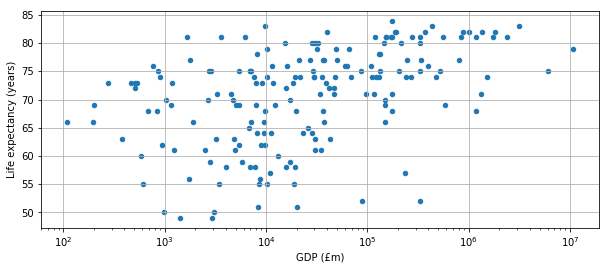

In [119]:
%matplotlib inline
gdpVsLifeClean.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize = (10, 4))

##### Kowalski, Analysis!
The major tick marks in the x-axis go from 102 (that’s a one followed by two zeros, hence 100) to 108 (that’s a one followed by eight zeros, hence 100,000,000) million pounds, with the minor ticks marking the numbers in between. For example, the eight minor ticks between 102 and 103 represent the values 200 (2 × 102 ), 300 (3 × 102), and so on until 900 (9 × 102). As a further example, the country with the lowest life expectancy is on the second minor tick to the right of 103, which means its GDP is about 3 × 103 (three thousand) million pounds.

Countries with a GDP around 10 thousand (104) millions of pounds have a wide range of life expectancies, from under 50 to over 80, but the range tends to shrink both for poorer and for richer countries. Countries with the lowest life expectancy are neither the poorest nor the richest, but those with highest expectancy are among the richer countries.

### Tasks

- Swap the axes of the scatterplot, i.e. show the GDP in the y axis and the life expectancy in the x axis.
- Display a scatterplot of the GDP and the population.

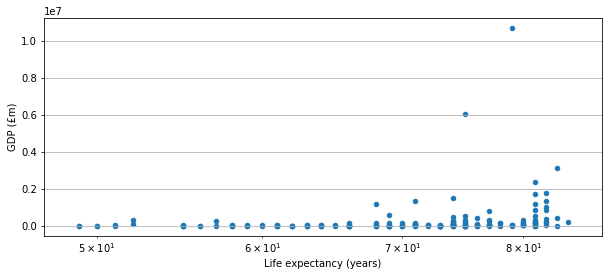

In [120]:
%matplotlib inline
gdpVsLifeClean.plot(x=LIFE, y=GDP, kind='scatter', grid=True, logx=True, figsize = (10, 4))

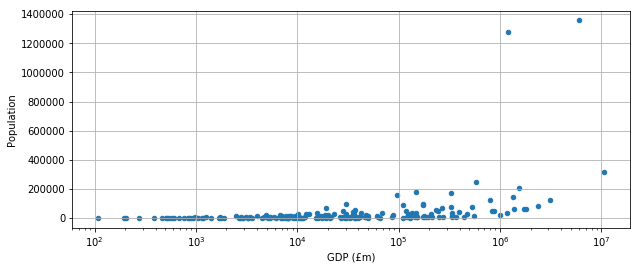

In [124]:
%matplotlib inline
gdpLifePop.plot(x=GDP, y='Population', kind='scatter', grid=True, logx=True, figsize = (10, 4))

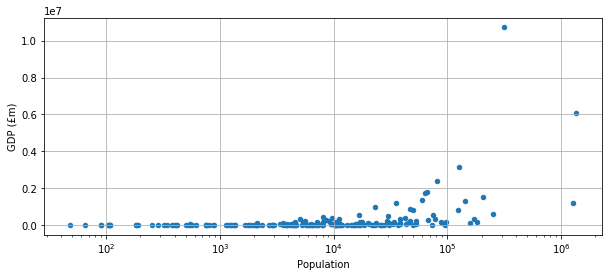

In [125]:
gdpLifePop.plot(x='Population', y=GDP, kind='scatter', grid=True, logx=True, figsize = (10, 4))

**Now go back to the course step and mark it complete.**